<a href="https://colab.research.google.com/github/ForhanShahriarFahim/Artificial-Intelligence-Lab/blob/master/3_Simple_DNN(Assignment_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Activation
from tensorflow.keras.models import Model
from tensorflow.keras import metrics
import tensorflow as tf
from sklearn.metrics import mean_squared_error

### **y = 5x^3-10x^2-20x+10**

In [ ]:
def y_value_calc(x):
  return 5 * x**3 - 10 * x**2 - 20 * x + 10

### **Building the Model**

In [ ]:
def dnn_model():
  inputs = Input((1,))
  hidden_layer1 = Dense(32, activation='relu')(inputs)
  hidden_layer2 = Dense(64, activation='relu')(hidden_layer1)
  hidden_layer3 = Dense(128, activation='relu')(hidden_layer2)

  outputs = Dense(1, name = 'Output_Layer')(hidden_layer3)

  model = Model(inputs, outputs, name = 'DNN_Model')
  return model

### Creating Dataset

In [ ]:
def value_generate(data):
  x = np.random.randint(-20, 20, data, dtype=int)
  y = y_value_calc(x)
  return x, y

### Normalize function for data between [-1,1]

In [ ]:
def normalize(values):
  maximum = np.max(values)
  minimum = np.min(values)

  return (2 * (values - minimum) / (maximum - minimum)) - 1

### Creating training, validation and test split

In [ ]:
x, y = value_generate(10000)

# Performing Normalization
x_data = normalize(x)
y_data = normalize(y)


data_length = len(x_data)
#Test
x_test, y_test = x_data[:int(data_length * 0.05)], y_data[:int(data_length * 0.05)]
#Validation
x_validation, y_validation = x_data[int(data_length * 0.05):int(data_length * 0.1)], y_data[int(data_length * 0.05):int(data_length * 0.1)]
#Train
x_train, y_train = x_data[int(data_length * 0.1):], y_data[int(data_length * 0.1):]

In [ ]:
print(f"Test set size: {len(x_test)}")
print(f"Validation set size: {len(x_validation)}")
print(f"Training set size: {len(x_train)}")


Test set size: 500
Validation set size: 500
Training set size: 9000


# Model Train

In [ ]:
model = dnn_model()
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss='mean_squared_error',metrics=[metrics.R2Score(name='accuracy')])
fitted_model = model.fit(x_train, y_train, epochs=10, validation_data=(x_validation, y_validation))

history = fitted_model.history


Model: "DNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output_Layer (Dense)                 │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,625 (41.50 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8273 - loss: 0.0285 - val_accuracy: 0.9974 - val_loss: 3.8068e-04
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9988 - loss: 1.9073e-04 - val_accuracy: 0.9998 - val_loss: 3.2874e-05
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9998 - loss: 3.4069e-05 - val_accuracy: 0.9998 - val_loss: 2.3389e-05
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 1.5334e-05 - val_accuracy: 1.0000 - val_loss: 4.9354e-06
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 1.3092e-05 - val_accuracy: 0.9997 - val_loss: 3.9229e-05
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 2.2061e-05 - val_accuracy: 0.9997 - val_loss: 3.7906e-05
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9999 - loss: 8.8227e-06 - val_accuracy: 1.0000 - val_loss: 2.6086e-06
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

In [ ]:
history

{'accuracy': [0.9394720196723938,
  0.9992720484733582,
  0.9998472332954407,
  0.9999327659606934,
  0.9999180436134338,
  0.9998775124549866,
  0.9999472498893738,
  0.9999300241470337,
  0.9998238682746887,
  0.9995396733283997],
 'loss': [0.010123899206519127,
  0.00012175756273791194,
  2.5553545128786936e-05,
  1.1241146239626687e-05,
  1.370820973534137e-05,
  2.0486628272919916e-05,
  8.824290489428677e-06,
  1.1699738934112247e-05,
  2.9462420570780523e-05,
  7.699066918576136e-05],
 'val_accuracy': [0.9974427819252014,
  0.9997791647911072,
  0.9998428821563721,
  0.9999668598175049,
  0.999736487865448,
  0.9997453689575195,
  0.999982476234436,
  0.9998878240585327,
  0.9996435046195984,
  0.9999305605888367],
 'val_loss': [0.0003806769382208586,
  3.287364597781561e-05,
  2.3389191483147442e-05,
  4.93544212076813e-06,
  3.922911128029227e-05,
  3.790594564634375e-05,
  2.608604063425446e-06,
  1.6702924767741933e-05,
  5.306662933435291e-05,
  1.0332766578358132e-05]}

### Display the training accuracy vs validation accuracy and training error vs validation error curves.

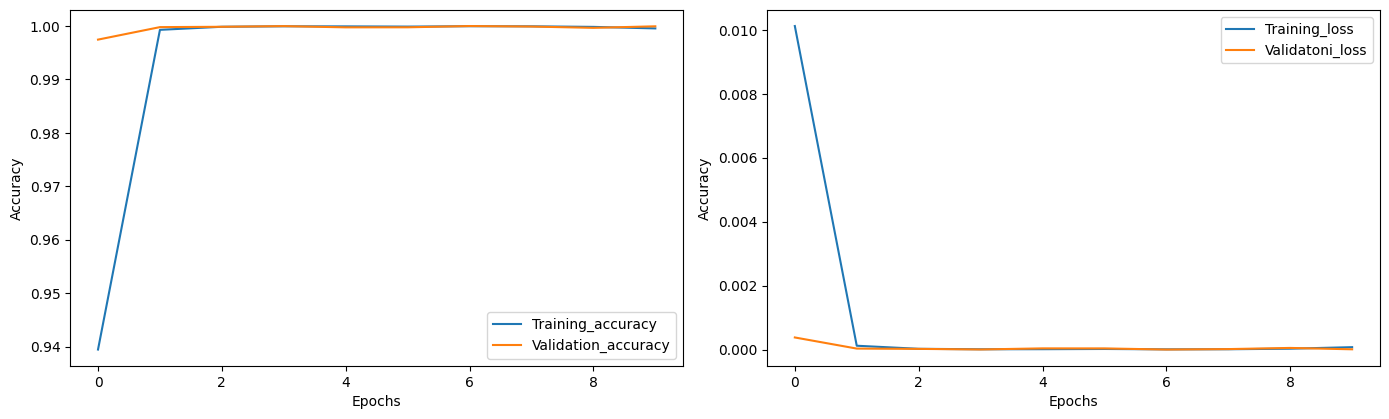

In [ ]:
plt.figure(figsize=(14,8))

plt.subplot(2,2,1)
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_accuracy', 'Validation_accuracy'])

plt.subplot(2,2,2)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_loss', 'Validatoni_loss'])



plt.tight_layout()
plt.show()

In [ ]:

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict on test data
predictions = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 2.8469e-06 
Test Loss: 2.9912123409303604e-06
Test Accuracy: 0.9999825954437256
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
